<a href="https://colab.research.google.com/github/GitMishka/1/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string


  Survey Metadata - Start Date (+00:00 GMT)  \
0                            8/24/2023 1:53   
1                           8/29/2023 12:29   
2                            8/29/2023 0:26   
3                           8/25/2023 14:47   
4                           8/25/2023 14:47   

  Survey Metadata - End Date (+00:00 GMT) Survey Metadata - Response Type  \
0                          8/24/2023 1:53                      IP Address   
1                         8/29/2023 12:29                      IP Address   
2                          8/29/2023 0:26                      IP Address   
3                         8/27/2023 11:07                      IP Address   
4                         8/26/2023 20:10                      IP Address   

  Survey Metadata - IP Address  Survey Metadata - Progress  \
0               173.186.74.109                          50   
1                  69.12.38.72                         100   
2                172.59.81.214                         100   
3     

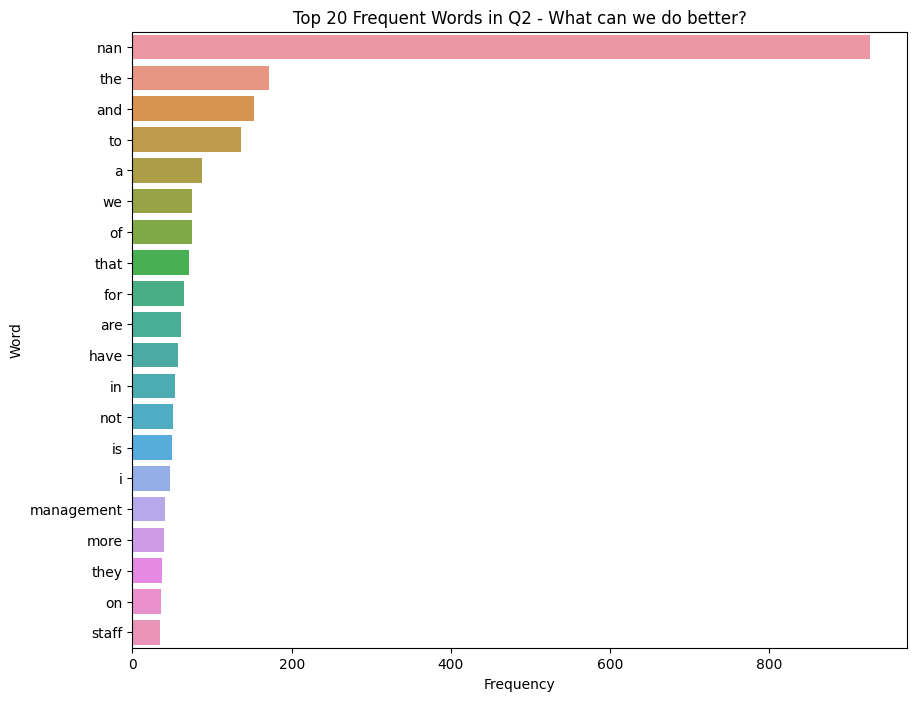

In [7]:
# 1. Load the data
df = pd.read_csv('/content/drive/MyDrive/Work/Survey/Qualtrix1.csv')

# Check the first few rows to ensure data is loaded correctly
print(df.head())

# 2. Text Cleaning
def clean_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove white spaces
    return text

df['cleaned_Q2'] = df['Q2 - What can we do better?'].apply(clean_text)

stopwords = ['nan', 'the', 'and', 'to', 'of', 'in', 'for', 'is', 'on', 'with', 'as', 'it', 'at', 'this', 'that', 'but', 'be', 'are']

# 3. Word Analysis
words = ' '.join(df['cleaned_Q2']).split()  # Join all text and split to get individual words
filtered_words = [word for word in words if word not in stopwords]  # Remove stopwords
word_freq = Counter(filtered_words)  # Get word frequencies
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])  # Get top 20 frequent words

# Plotting
plt.figure(figsize=(10,8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title('Top 20 Frequent Words in Q2 - What can we do better?')
plt.show()
